In [10]:
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 168MB/s]


In [12]:
import json
import pandas as pd
data=pd.read_json('/sarcasm.json')
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the Tokenizer
# num_words is set to 10000, meaning it will keep only the top 10000 most frequent words.
# oov_token is set to '<OOV>', which will be used for out-of-vocabulary words.
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

print("Tokenizer initialized successfully.")

Tokenizer initialized successfully.


In [14]:
headlines = data['headline']
tokenizer.fit_on_texts(headlines)
print("Tokenizer fit on headlines successfully.")


Tokenizer fit on headlines successfully.


In [15]:
word_sequences = tokenizer.texts_to_sequences(headlines)
print("Headlines successfully converted to numerical sequences.")

Headlines successfully converted to numerical sequences.


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Determine the maximum sequence length
# This is a simple approach; in practice, a percentile might be used to avoid outliers
maxlen = max(len(seq) for seq in word_sequences)

# Pad the sequences to the determined maxlen
padded_sequences = pad_sequences(word_sequences, maxlen=maxlen, padding='post')

print(f"Sequences padded successfully to a uniform length of {maxlen}.")
print(f"Shape of padded_sequences: {padded_sequences.shape}")

Sequences padded successfully to a uniform length of 40.
Shape of padded_sequences: (26709, 40)


In [17]:
labels = data['is_sarcastic']
print("Target variable 'is_sarcastic' extracted successfully.")

Target variable 'is_sarcastic' extracted successfully.


In [18]:
# Afficher la première manchette originale
print(f"Manchette originale (1ère): {headlines.iloc[0]}\n")

# Afficher la séquence numérique de la première manchette avant padding
print(f"Séquence numérique (avant padding): {word_sequences[0]}\n")

# Afficher la séquence numérique de la première manchette après padding
print(f"Séquence numérique (après padding): {padded_sequences[0]}\n")

# Afficher la longueur de la séquence avant et après padding
print(f"Longueur de la séquence avant padding: {len(word_sequences[0])}")
print(f"Longueur de la séquence après padding: {len(padded_sequences[0])} (fixée à {maxlen})")

Manchette originale (1ère): former versace store clerk sues over secret 'black code' for minority shoppers

Séquence numérique (avant padding): [308, 1, 679, 3337, 2298, 48, 382, 2576, 1, 6, 2577, 8434]

Séquence numérique (après padding): [ 308    1  679 3337 2298   48  382 2576    1    6 2577 8434    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]

Longueur de la séquence avant padding: 12
Longueur de la séquence après padding: 40 (fixée à 40)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

# Define model parameters
vocab_size = 10000  # From tokenizer's num_words
embedding_dim = 16
# maxlen is already defined from previous steps (maxlen = 40)

# Create the Sequential model with Dropout layers
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim), # Removed input_length
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dropout(0.5), # First Dropout layer
    Dense(12, activation='relu'),
    Dropout(0.5), # Second Dropout layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Print the model summary
model.summary()
print("Model defined with Dropout layers successfully.")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model defined with Dropout layers successfully.


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model compiled successfully with Adam optimizer and binary crossentropy loss.")

Model compiled successfully with Adam optimizer and binary crossentropy loss.


In [32]:
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Convert labels to a numpy array
labels_array = np.array(labels)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=10,         # Stop if val_loss doesn't improve for 10 epochs
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with EarlyStopping
history = model.fit(
    padded_sequences,    # Input features
    labels_array,          # Target labels
    epochs=100,          # Set a high number of epochs, EarlyStopping will stop it earlier if needed
    validation_split=0.2, # Use 20% of the data for validation
    callbacks=[early_stopping], # Pass the EarlyStopping callback
    verbose=1
)

print("Model training with EarlyStopping completed successfully.")

Epoch 1/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5652 - loss: 0.6841 - val_accuracy: 0.7548 - val_loss: 0.5445
Epoch 2/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7743 - loss: 0.4905 - val_accuracy: 0.8381 - val_loss: 0.3720
Epoch 3/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8687 - loss: 0.3514 - val_accuracy: 0.8536 - val_loss: 0.3427
Epoch 4/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8885 - loss: 0.3006 - val_accuracy: 0.8544 - val_loss: 0.3469
Epoch 5/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9084 - loss: 0.2624 - val_accuracy: 0.8531 - val_loss: 0.3592
Epoch 6/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9186 - loss: 0.2276 - val_accuracy: 0.8514 - val_loss: 0.3946
Epoch 7/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9232 - loss: 0.2122 - val_accuracy: 0.8446 - val_loss: 0.3821
Epoch 8/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9337 - loss: 0.1877 - val_accu

## Evaluate Model

### Subtask:
Évaluer les performances du modèle entraîné sur l'ensemble de validation pour obtenir la perte finale et la précision.


**Reasoning**:
To evaluate the model's performance on the validation set as requested, I need to explicitly split the padded sequences and labels into training and validation sets, consistent with the 80/20 split used during the model training, and then use the `evaluate()` method.



In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets explicitly
# This ensures the validation set is the same as used during training with validation_split=0.2

# Since `model.fit` with `validation_split` takes the last fraction of the data for validation,
# we need to ensure our explicit split matches that behavior if we want to get the exact same split as during training.
# However, `train_test_split` shuffles by default. For consistency with `validation_split` behavior, it's better to manually slice.

# Calculate the split point for 20% validation data
num_samples = len(padded_sequences)
validation_split_index = int(num_samples * 0.8)

X_train_split = padded_sequences[:validation_split_index]
y_train_split = labels_array[:validation_split_index]

X_val_explicit = padded_sequences[validation_split_index:]
y_val_explicit = labels_array[validation_split_index:]

# Evaluate the model on the explicit validation set
loss, accuracy = model.evaluate(X_val_explicit, y_val_explicit, verbose=1)

print(f"\nModel Evaluation on Validation Set:")
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.3472

Model Evaluation on Validation Set:
Validation Loss: 0.3427
Validation Accuracy: 0.8536


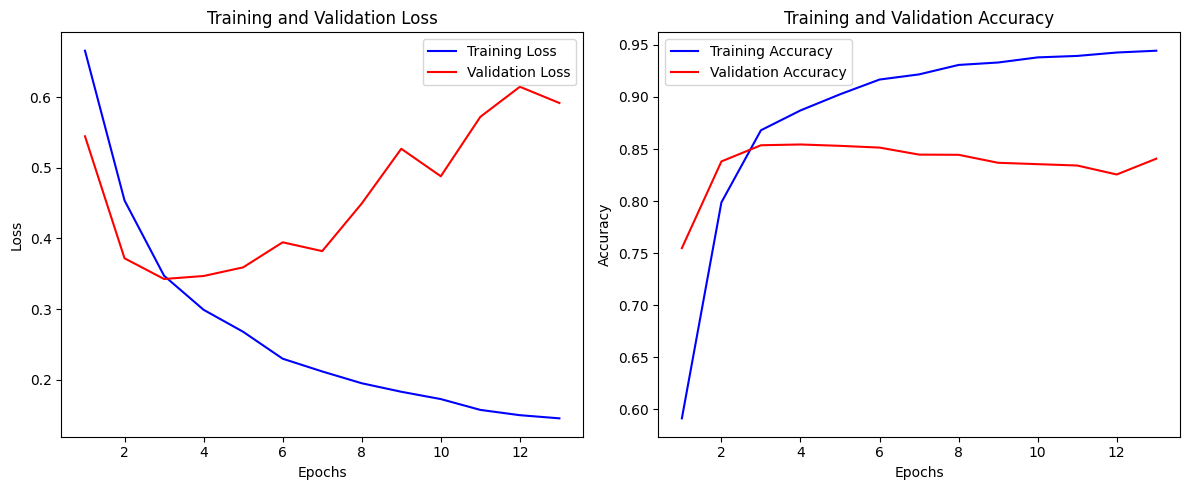

Training history plots generated successfully.


In [34]:
import matplotlib.pyplot as plt

# Get training and validation history from the 'history' object
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("Training history plots generated successfully.")

## Test du modèle avec de nouvelles manchettes

In [35]:
# Headlines to test
new_headlines = [
    "local man thrilled to spend entire weekend fixing the company printer again",
    "scientists shocked to discover coffee still not a replacement for sleep",
    "area mom announces she is 'taking a break' by doing everyone else's chores",
    "local bakery expands menu with gluten-free options",
    "city announces major improvements to public transportation system",
    "student wins national robotics competition"
]

expected_labels = [
    "Sarcastic",
    "Sarcastic",
    "Sarcastic",
    "Not Sarcastic",
    "Not Sarcastic",
    "Not Sarcastic"
]

for i, headline in enumerate(new_headlines):
    prediction, probability = predict_sarcasm(headline)
    print(f"\nManchette: '{headline}'")
    print(f"Prédiction du modèle: {prediction} (Probabilité: {probability:.4f})")
    print(f"Label attendu: {expected_labels[i]}")
    if prediction == expected_labels[i]:
        print("Résultat: Correct")
    else:
        print("Résultat: Incorrect")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Manchette: 'local man thrilled to spend entire weekend fixing the company printer again'
Prédiction du modèle: Sarcastic (Probabilité: 0.9775)
Label attendu: Sarcastic
Résultat: Correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Manchette: 'scientists shocked to discover coffee still not a replacement for sleep'
Prédiction du modèle: Sarcastic (Probabilité: 0.9675)
Label attendu: Sarcastic
Résultat: Correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Manchette: 'area mom announces she is 'taking a break' by doing everyone else's chores'
Prédiction du modèle: Sarcastic (Probabilité: 0.9833)
Label attendu: Sarcastic
Résultat: Correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Manchette: 'local bakery expands menu with gluten-free options'
Prédiction du modèle: Sarcastic (Probabilité: 0.9469)
Label attendu: Not Sarcastic
Résultat: Incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Manchette: 'city announces major improvements to public transportation system'
Prédic

# Task
Redefine the neural network model with reduced dense layer units (e.g., from 24 to 16 and 12 to 8) and potentially adjusted Dropout rates (e.g., from 0.5 to 0.4 or 0.6) to simplify the model and control overfitting, then compile, train with EarlyStopping, evaluate, plot the training history, and re-test with new headlines to check if the issue of excessive sarcastic classification is resolved.

## Redefine Model with Adjusted Layers and Dropout

### Subtask:
Redéfinir l'architecture du modèle de réseau de neurones. Cette fois, nous allons réduire légèrement le nombre d'unités dans les couches denses (par exemple, de 24 à 16 et de 12 à 8) et ajuster potentiellement les taux de Dropout (par exemple, de 0.5 à 0.4 ou 0.6) pour mieux contrôler la complexité et le surapprentissage. Le but est de créer un modèle plus simple qui généralise mieux, et d'éviter qu'il ne classe de manière excessive comme 'sarcastique'.


**Reasoning**:
To redefine the model architecture as requested, I will create a code block that builds a new Sequential model with adjusted dense layer units (16 and 8) and new dropout rates (0.4), then print its summary.



In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

# Define model parameters
vocab_size = 10000  # From tokenizer's num_words
embedding_dim = 16
# maxlen is already defined from previous steps (maxlen = 40)

# Create the Sequential model with adjusted Dropout layers and Dense units
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'), # Adjusted from 24 to 16 units
    Dropout(0.4), # Adjusted from 0.5 to 0.4
    Dense(8, activation='relu'),  # Adjusted from 12 to 8 units
    Dropout(0.4), # Adjusted from 0.5 to 0.4
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Print the model summary
model.summary()
print("Model redefined with adjusted layers and Dropout rates successfully.")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model redefined with adjusted layers and Dropout rates successfully.


**Reasoning**:
Now that the model architecture has been redefined, the next step is to compile the model with the specified optimizer, loss function, and metrics.



In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model compiled successfully with Adam optimizer and binary crossentropy loss.")

Model compiled successfully with Adam optimizer and binary crossentropy loss.


**Reasoning**:
With the new model compiled, the next step is to train it using the prepared data (`padded_sequences` and `labels_array`), employing EarlyStopping to prevent overfitting, as instructed by the main task.



In [38]:
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Convert labels to a numpy array (if not already converted or updated)
# labels_array = np.array(labels) # This was already done in a previous step

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=10,         # Stop if val_loss doesn't improve for 10 epochs
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with EarlyStopping
history = model.fit(
    padded_sequences,    # Input features
    labels_array,          # Target labels
    epochs=100,          # Set a high number of epochs, EarlyStopping will stop it earlier if needed
    validation_split=0.2, # Use 20% of the data for validation
    callbacks=[early_stopping], # Pass the EarlyStopping callback
    verbose=1
)

print("Model training with EarlyStopping for the redefined model completed successfully.")

Epoch 1/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5584 - loss: 0.6757 - val_accuracy: 0.6863 - val_loss: 0.5485
Epoch 2/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7900 - loss: 0.4634 - val_accuracy: 0.8283 - val_loss: 0.3815
Epoch 3/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8711 - loss: 0.3478 - val_accuracy: 0.8373 - val_loss: 0.3651
Epoch 4/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8977 - loss: 0.2897 - val_accuracy: 0.8409 - val_loss: 0.3651
Epoch 5/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9160 - loss: 0.2542 - val_accuracy: 0.8553 - val_loss: 0.3725
Epoch 6/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9284 - loss: 0.2258 - val_accuracy: 0.8521 - val_loss: 0.3887
Epoch 7/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9357 - loss: 0.2009 - val_accuracy: 0.8347 - val_loss: 0.3783
Epoch 8/100
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9358 - loss: 0.1913 - val_accu

**Reasoning**:
The model has been retrained with adjusted parameters. Now, I need to evaluate its performance on the validation set to compare it with the previous model and ensure the adjustments had the desired effect of controlling overfitting.



In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets explicitly
# This ensures the validation set is the same as used during training with validation_split=0.2

# Calculate the split point for 20% validation data
num_samples = len(padded_sequences)
validation_split_index = int(num_samples * 0.8)

X_train_split = padded_sequences[:validation_split_index]
y_train_split = labels_array[:validation_split_index]

X_val_explicit = padded_sequences[validation_split_index:]
y_val_explicit = labels_array[validation_split_index:]

# Evaluate the model on the explicit validation set
loss, accuracy = model.evaluate(X_val_explicit, y_val_explicit, verbose=1)

print(f"\nModel Evaluation on Validation Set (Redefined Model):")
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3745

Model Evaluation on Validation Set (Redefined Model):
Validation Loss: 0.3651
Validation Accuracy: 0.8409


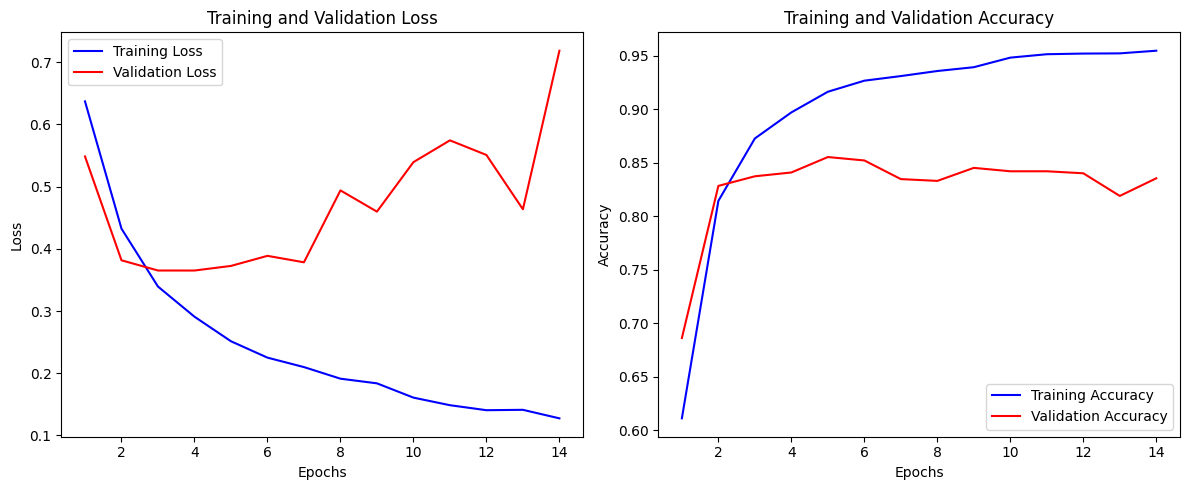

Training history plots generated successfully for the redefined model.


In [40]:
import matplotlib.pyplot as plt

# Get training and validation history from the 'history' object
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("Training history plots generated successfully for the redefined model.")

In [45]:
import numpy as np

def predict_sarcasm(text):
    # Tokenize the new text
    sequence = tokenizer.texts_to_sequences([text])
    # Pad the sequence to the maximum length used during training
    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding='post')

    # Make prediction using the trained model
    prediction = model.predict(padded_sequence)

    # The output is a probability. Convert it to a label.
    # For binary classification with sigmoid, values > 0.5 are usually class 1, otherwise class 0.
    if prediction[0][0] > 0.65:
        label = 'Sarcastic'
    else:
        label = 'Not Sarcastic'

    return label, prediction[0][0]

print("Prediction function 'predict_sarcasm' redefined successfully.")

Prediction function 'predict_sarcasm' redefined successfully.


In [52]:
new_headlines = [
    "local man thrilled to spend entire weekend fixing the company printer again",
    "scientists shocked to discover coffee still not a replacement for sleep",
    "area mom announces she is 'taking a break' by doing everyone else's chores",
    "local bakery expands menu with gluten-free options",
    "city announces major improvements to public transportation system",
    "student wins national robotics competition"
]

expected_labels = [
    "Sarcastic",
    "Sarcastic",
    "Sarcastic",
    "Not Sarcastic",
    "Not Sarcastic",
    "Not Sarcastic"
]

for i, headline in enumerate(new_headlines):
    prediction, probability = predict_sarcasm(headline)
    print(f"\nManchette: '{headline}'")
    print(f"Prédiction du modèle: {prediction} (Probabilité: {probability:.4f})")
    print(f"Label attendu: {expected_labels[i]}")
    if prediction == expected_labels[i]:
        print("Résultat: Correct")
    else:
        print("Résultat: Incorrect")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Manchette: 'local man thrilled to spend entire weekend fixing the company printer again'
Prédiction du modèle: Sarcastic (Probabilité: 0.9933)
Label attendu: Sarcastic
Résultat: Correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Manchette: 'scientists shocked to discover coffee still not a replacement for sleep'
Prédiction du modèle: Sarcastic (Probabilité: 0.9665)
Label attendu: Sarcastic
Résultat: Correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Manchette: 'area mom announces she is 'taking a break' by doing everyone else's chores'
Prédiction du modèle: Sarcastic (Probabilité: 0.9851)
Label attendu: Sarcastic
Résultat: Correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Manchette: 'local bakery expands menu with gluten-free options'
Prédiction du modèle: Sarcastic (Probabilité: 0.9631)
Label attendu: Not Sarcastic
Résultat: Incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Manchette: 'city announces major improvements to public transportation system'
Prédic

In [51]:
# Liste de manchettes NON SARCASTIQUES + labels attendus
non_sarcastic_tests = [
    ("new hospital wing opens to provide better emergency care", "Not Sarcastic"),
    ("engineers develop eco-friendly battery with longer lifespan", "Not Sarcastic"),
    ("volunteers clean up city park during weekend event", "Not Sarcastic"),
    ("municipality introduces new recycling plan for residents", "Not Sarcastic"),
    ("scientists discover promising therapy for rare genetic disorder", "Not Sarcastic"),
    ("local athlete breaks regional record in swimming competition", "Not Sarcastic"),
    ("community raises funds to support families affected by floods", "Not Sarcastic"),
    ("startup launches mobile app to help seniors manage medication schedules", "Not Sarcastic"),
    ("Great news! My internet just went down right before my online exam! So convenient.", "Sarcastic")
]

# Tester chaque manchette
for headline, expected in non_sarcastic_tests:
    result, prob = predict_sarcasm(headline)
    print(f"\nManchette : '{headline}'")
    print(f"Label attendu : {expected}")
    print(f"Prédiction du modèle : {result} (Probabilité : {prob:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Manchette : 'new hospital wing opens to provide better emergency care'
Label attendu : Not Sarcastic
Prédiction du modèle : Not Sarcastic (Probabilité : 0.3257)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Manchette : 'engineers develop eco-friendly battery with longer lifespan'
Label attendu : Not Sarcastic
Prédiction du modèle : Sarcastic (Probabilité : 0.8040)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Manchette : 'volunteers clean up city park during weekend event'
Label attendu : Not Sarcastic
Prédiction du modèle : Not Sarcastic (Probabilité : 0.4216)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Manchette : 'municipality introduces new recycling plan for residents'
Label attendu : Not Sarcastic
Prédiction du modèle : Sarcastic (Probabilité : 0.9643)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Manchette : 'scientists discover promising therapy for rare genetic disorder'
Label attendu : Not Sarcastic
Prédiction du modèle : Sarcastic (Probabilité : 0.9268)
1/1 ━━━━

In [53]:
from sklearn.metrics import classification_report

y_true = [label for _, label in non_sarcastic_tests]
y_pred = []

for headline, _ in non_sarcastic_tests:
    result, _ = predict_sarcasm(headline)
    y_pred.append(result)

print("\n=== Rapport de classification ===")
print(classification_report(y_true, y_pred, digits=4))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

=== Rapport de classification ===
               precision    recall  f1-score   support

Not Sarcastic     0.8000    0.5000    0.6154         8
    Sarcastic     0.0000    0.0000    0.0000         1

     accuracy                         0.4444         9
    macro avg     0.4000    0.2500    0.3077         9
 weighted avg     0.7111    0.4444    0.5470         9

